In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_condition = 'Swapped'
instrument = 'Glacier'

In [3]:
df = pd.read_csv('Glacier_swapped.csv')
df.head()

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
0,SBL (pre-production),Pre-Prime Flush 1000ul,Fluidics Calibration,NaN,NaN,glacier,False,2020-09-29T13:55:22.158174-04:00,NaN,d5260872-bc19-446e-b315-d661f0161d23,...,{},10394.734838,8803.635953,91d306a4-374f-4826-a0e0-79ad3f1203af,17,1591.098885,1000,H2O,0.035,True
1,SBL (pre-production),Prime check H2O prime_ul=2000 valve_num=17,Fluidics Calibration,NaN,NaN,glacier,False,2020-09-29T13:55:38.516034-04:00,NaN,d5260872-bc19-446e-b315-d661f0161d23,...,{},13643.526370,10394.594751,a85236b7-9aed-4b85-b8c7-9523c77f5de7,17,3248.931619,2000,H2O,0.035,True
2,SBL (pre-production),Pre-Prime Flush 1000ul,Fluidics Calibration,NaN,NaN,glacier,False,2020-09-29T13:56:09.355119-04:00,NaN,d5260872-bc19-446e-b315-d661f0161d23,...,{},15158.687702,13644.139250,7fb2aaaf-7d3a-4298-9d90-7eda4f639a05,18,1514.548452,1000,WASH1E,0.035,True
3,SBL (pre-production),Prime check WASH1E prime_ul=2000 valve_num=18,Fluidics Calibration,NaN,NaN,glacier,False,2020-09-29T13:56:26.450612-04:00,NaN,d5260872-bc19-446e-b315-d661f0161d23,...,{},17942.191430,15158.099337,4a858af4-6632-4f33-9136-b0adcd8209f3,18,2784.092093,2000,WASH1E,0.035,True
4,SBL (pre-production),Pre-Prime Flush 1000ul,Fluidics Calibration,NaN,NaN,glacier,False,2020-09-29T13:57:49.389853-04:00,NaN,d5260872-bc19-446e-b315-d661f0161d23,...,{},9868.884007,8776.136914,8802fee0-a340-4b3f-b027-8a9c9bf4668c,19,1092.747093,1000,_H2O19,0.035,True


In [4]:
df_runtime = df.loc[(df['device_task_top_level'] != 'Fluidics Calibration') 
                    & (df['device_task_view_id'] != 'prep_reagents') 
                    & (df['dispense_type'] == 'reagent') 
                    & (df['volume_ul'] > 75)
                    & (df['reagent'] != 'H2O')]

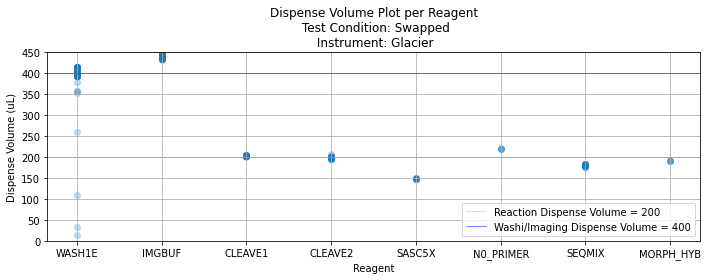

In [5]:
fig, ax = plt.subplots(figsize=(10,4))

ax.scatter(df_runtime['reagent'], df_runtime['weight_mg'], alpha=0.25)
ax.set(xlabel='Reagent', ylabel='Dispense Volume (uL)', 
       title='Dispense Volume Plot per Reagent'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument),
      ylim=(0,450))
ax.axhline(200, color='r', label='Reaction Dispense Volume = 200', linewidth=0.5, linestyle=':')
ax.axhline(400, color = 'b', label='Washi/Imaging Dispense Volume = 400', linewidth=0.5)
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
df_runtime.groupby('reagent').weight_mg.describe()

,count,mean,std,min,25%,50%,75%,max
reagent,,,,,,,,
CLEAVE1,24.0,203.458276,0.867848,201.080595,203.092591,203.518105,203.976889,205.143112
CLEAVE2,24.0,199.136015,2.533052,194.549047,197.905002,199.231449,200.692729,206.484443
IMGBUF,32.0,439.993381,5.086024,431.498867,435.724236,439.012773,443.457027,450.963929
MORPH_HYB,4.0,190.289533,1.154988,189.586473,189.589099,189.786096,190.486530,191.999468
N0_PRIMER,4.0,220.548282,1.362479,219.687624,219.716517,219.973051,220.804816,222.559403
SASC5X,8.0,148.489821,0.993858,147.147176,147.744296,148.418464,149.137284,150.110012
SEQMIX,20.0,180.793924,2.234214,176.127633,179.959883,180.843305,182.078696,184.595880
WASH1E,876.0,404.860527,22.108903,13.840576,403.925407,407.799683,409.404552,415.627033


In [7]:
sums = df_runtime.groupby('reagent', as_index=False).sum()

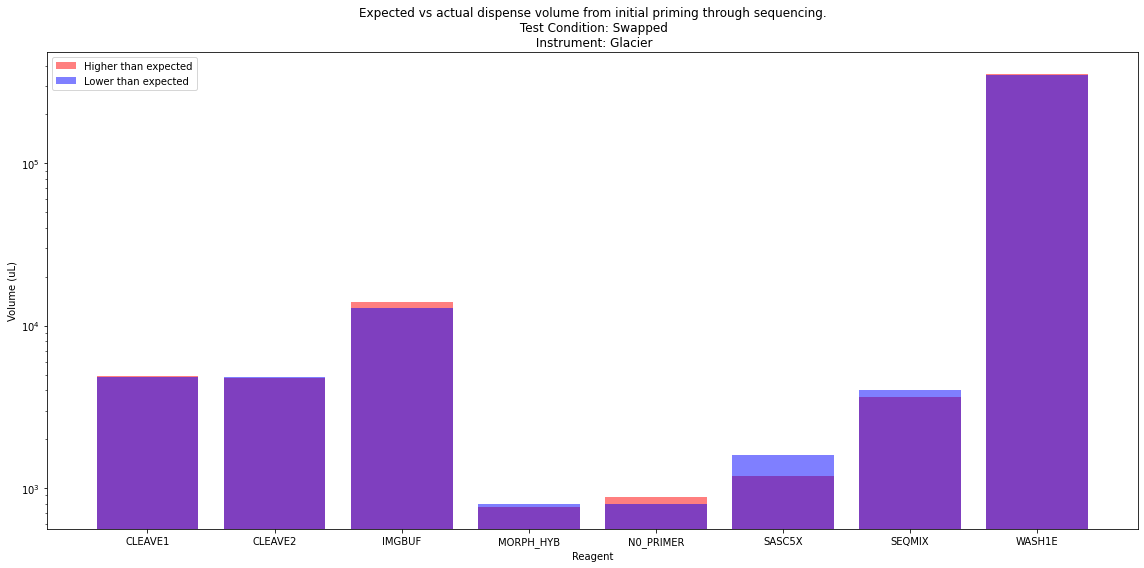

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['weight_mg'], color='r', alpha=0.5, label='Higher than expected')
ax.bar(sums['reagent'], sums['volume_ul'], color='b', alpha=0.5, label='Lower than expected')
ax.set(xlabel='Reagent', ylabel='Volume (uL)', 
       title='Expected vs actual dispense volume from initial priming through sequencing.'
       '\n Test Condition: {0}'
       '\n Instrument: {1}'.format(test_condition, instrument), yscale='log')
# ax.set_xticklabels(sums['reagent'], rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
sums['per_error'] = (sums['weight_mg'] - sums['volume_ul']) / sums['volume_ul']

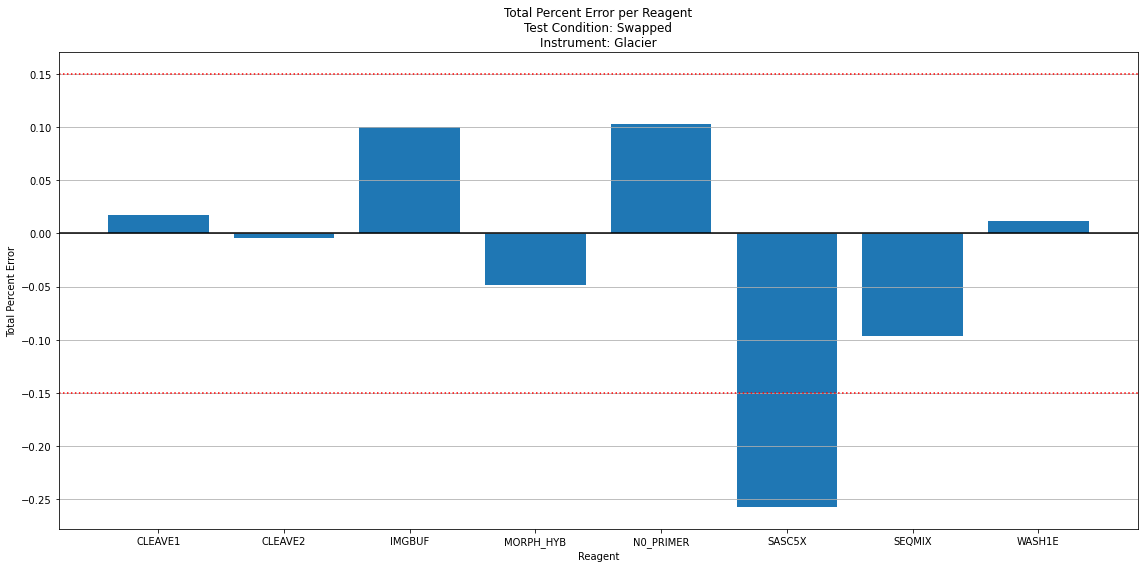

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['per_error'])
ax.axhline(0.15, color='r', linestyle=':')
ax.axhline(-0.15, color='r', linestyle=':')
ax.axhline(0, color='k', linestyle='-')
# ax.set_xticklabels(sums['reagent'], rotation=45)
ax.set(xlabel='Reagent', ylabel='Total Percent Error', 
       title='Total Percent Error per Reagent'
      '\nTest Condition: {0}'
      '\nInstrument: {1}'.format(test_condition, instrument))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
wash_df = df_runtime.loc[df_runtime['reagent'] == 'WASH1E']
wash_df.head()

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
143,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,glacier,False,2020-09-29T17:19:03.001844-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9195.062991,8793.395608,d608b176-1751-4a15-bffc-7a5ad7a91fad,18,401.667383,400,WASH1E,0.024103,False
146,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,glacier,False,2020-09-29T17:19:54.599832-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 1}",9676.285669,9272.530992,1d5e9ca0-1aea-4465-b1a4-0408749df12c,18,403.754676,400,WASH1E,0.024103,False
149,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,glacier,False,2020-09-29T17:20:18.611192-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 2}",9182.339607,8779.831703,d1a59d5d-039c-4233-b41c-e06efb4b512e,18,402.507904,400,WASH1E,0.024103,False
158,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,glacier,False,2020-09-29T17:23:58.015335-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 1}",9206.571122,8804.662089,47f60ca2-58ce-439f-862a-64f0d345375d,18,401.909033,400,WASH1E,0.024103,False
161,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,roi_selection,NaN,glacier,False,2020-09-29T17:24:29.972986-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9096.697541,8693.867438,07e22548-be47-43d0-a48c-74116b2271e2,18,402.830104,400,WASH1E,0.024103,False


In [12]:
wash_df.sort_values('weight_mg')

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
372,SBL (pre-production),Dispense WASH1E cycle 7/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:14:00.322488-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 1}",9079.536908,9065.696332,320e39d9-060a-40d7-a43b-2576ff6130b2,18,13.840576,400,WASH1E,0.024103,False
373,SBL (pre-production),Dispense WASH1E cycle 7/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:14:08.650720-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 2}",9111.038927,9078.864491,5352095f-e603-4b05-86a6-12484039c232,18,32.174436,400,WASH1E,0.024103,False
371,SBL (pre-production),Dispense WASH1E cycle 7/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:13:55.364914-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9106.142894,8995.950616,0847180b-478e-4cf4-83b0-1295440f1d94,18,110.192278,400,WASH1E,0.024103,False
370,SBL (pre-production),Dispense WASH1E cycle 7/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:13:49.230759-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 1}",8995.992642,8736.089600,cf40bb71-06a8-46e8-86e4-79a04e504f05,18,259.903042,400,WASH1E,0.024103,False
364,SBL (pre-production),Dispense WASH1E cycle 6/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:12:55.872036-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9472.623975,9119.311053,e1ed3e75-44f0-424a-8cf1-606257842de4,18,353.312922,400,WASH1E,0.024103,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,SBL (pre-production),Dispense WASH1E cycle 10/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:26:08.320412-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 1}",9990.678974,9576.130610,73996bcf-fd80-4af0-af00-8132b32493b7,18,414.548365,400,WASH1E,0.024103,False
396,SBL (pre-production),Dispense WASH1E cycle 9/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:25:00.873857-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9571.994547,9157.159005,160e685d-2409-4749-be43-ab4a5e6a1067,18,414.835542,400,WASH1E,0.024103,False
403,SBL (pre-production),Dispense WASH1E cycle 10/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:26:01.893240-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 1, 'well_num': 2}",9576.568381,9161.631276,ec61dd60-2ab4-4634-a16f-2d46408a9e06,18,414.937105,400,WASH1E,0.024103,False
398,SBL (pre-production),Dispense WASH1E cycle 9/10,Sequencing Run,progress,NaN,glacier,False,2020-09-29T18:25:13.411746-04:00,fl_dispense_reagent_to_wells,d5260872-bc19-446e-b315-d661f0161d23,...,"{'slot_num': 2, 'well_num': 2}",10401.367948,9986.136660,1545a6fd-320e-42d3-8200-7477a04d5a5f,18,415.231288,400,WASH1E,0.024103,False
